In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 20.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 3.4 MB/s eta 0:00:00


# import necessary library's 

In [3]:

import supervision
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
import os
warnings.simplefilter('ignore')
os.environ['WANDB_DISABLED'] = 'true'

In [4]:
class CFG:
    EPOCHS = 30
    BATCH_SIZE = 32
    SEED = 6
    LEARNING_RATE = 0.001
    NUM_SAMPLES = 16
    OPTIMIZER = 'Adam'
    
    DATA_PATH = '/kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/data.yaml'
    SAMPLE_PATH = '/kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/test/images/*'

# sample image

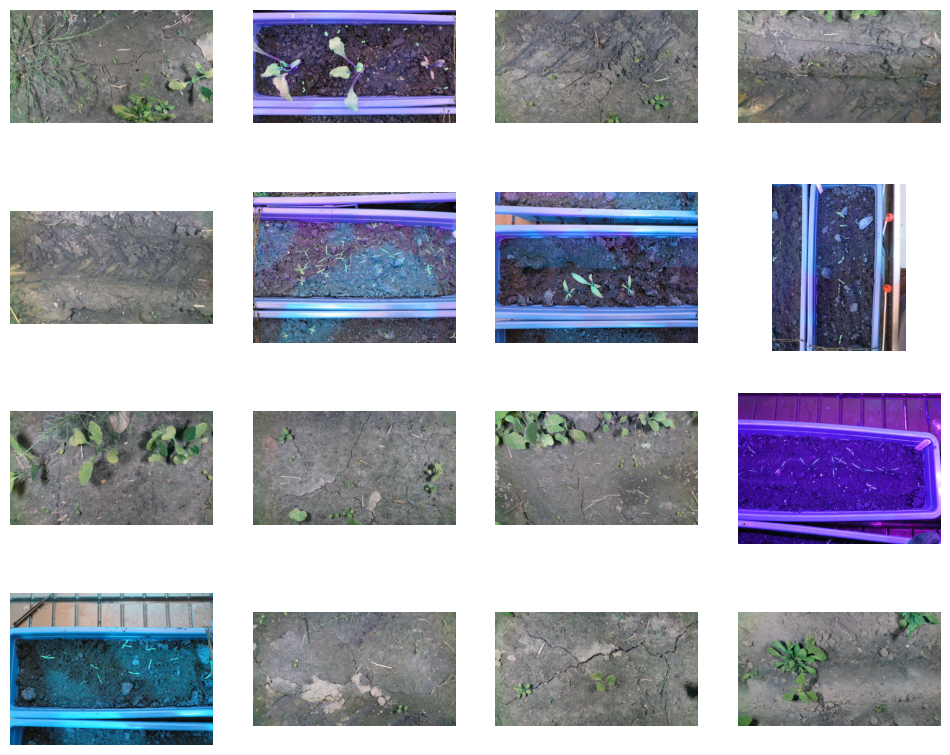

In [5]:
images_data = glob(CFG.SAMPLE_PATH)
random_image = random.sample(images_data, CFG.NUM_SAMPLES)

plt.figure(figsize=(12,10))
for i in range(CFG.NUM_SAMPLES):
    plt.subplot(4,4,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('off')

# load the model

In [6]:
yolo_v8 = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 245MB/s]


#  fine tune the model

In [7]:
v8_model = yolo_v8.train(data=CFG.DATA_PATH,seed=CFG.SEED,epochs=CFG.EPOCHS, lr0=CFG.LEARNING_RATE, optimizer=CFG.OPTIMIZER, verbose=True,
    project='ft_models',  
    name='yolo_v8')

Ultralytics YOLOv8.2.42 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=ft_models, name=yolo_v8, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=6, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

100%|██████████| 755k/755k [00:00<00:00, 23.7MB/s]
2024-06-26 10:27:37,163	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-26 10:27:38,021	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 123MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/train/labels... 2469 images, 101 backgrounds, 0 corrupt: 100%|██████████| 2469/2469 [00:12<00:00, 190.95it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/valid/labels... 235 images, 0 backgrounds, 0 corrupt: 100%|██████████| 235/235 [00:01<00:00, 188.13it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/valid is not writeable, cache not saved.


Plotting labels to ft_models/yolo_v8/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to ft_models/yolo_v8
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       7.2G      2.627      2.398      1.294         78        640: 100%|██████████| 155/155 [01:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        235       1605      0.308      0.503      0.314      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.18G      2.458      1.972       1.24         24        640: 100%|██████████| 155/155 [01:16<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]


                   all        235       1605        0.5      0.457      0.429      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.01G      2.379      1.869      1.213         64        640: 100%|██████████| 155/155 [01:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]


                   all        235       1605      0.455      0.498      0.482      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.17G      2.377      1.843      1.195         53        640: 100%|██████████| 155/155 [01:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        235       1605      0.416      0.456        0.4      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.05G      2.274      1.754      1.179         18        640: 100%|██████████| 155/155 [01:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]


                   all        235       1605      0.471      0.564      0.494      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.17G      2.238       1.68      1.159         65        640: 100%|██████████| 155/155 [01:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        235       1605      0.491      0.558      0.525      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.12G      2.192      1.624      1.142         50        640: 100%|██████████| 155/155 [01:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]


                   all        235       1605      0.552      0.557      0.532      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.14G      2.157      1.594      1.143         24        640: 100%|██████████| 155/155 [01:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]


                   all        235       1605       0.54      0.592      0.539      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.04G      2.154      1.591      1.138         67        640: 100%|██████████| 155/155 [01:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        235       1605      0.522      0.623      0.525      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.11G       2.12      1.543      1.125         32        640: 100%|██████████| 155/155 [01:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        235       1605      0.577      0.599       0.58      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.14G      2.067      1.477      1.095         50        640: 100%|██████████| 155/155 [01:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        235       1605       0.54      0.549       0.59      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       7.2G      2.038      1.464      1.091         32        640: 100%|██████████| 155/155 [01:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]


                   all        235       1605       0.62      0.649      0.685      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.07G      1.982      1.431      1.084         33        640: 100%|██████████| 155/155 [01:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]


                   all        235       1605      0.629       0.67      0.694      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.18G       1.96      1.365      1.074         44        640: 100%|██████████| 155/155 [01:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        235       1605      0.505      0.605      0.497      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.16G       1.96      1.342      1.073         53        640: 100%|██████████| 155/155 [01:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        235       1605      0.664      0.664      0.671      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.21G       1.96       1.35      1.073         39        640: 100%|██████████| 155/155 [01:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]


                   all        235       1605      0.557      0.708      0.682      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.03G      1.902      1.282      1.061         46        640: 100%|██████████| 155/155 [01:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        235       1605      0.637      0.648      0.668       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.12G      1.855      1.258      1.047         50        640: 100%|██████████| 155/155 [01:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        235       1605      0.633       0.71      0.654       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.16G      1.858      1.228      1.038         65        640: 100%|██████████| 155/155 [01:15<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        235       1605      0.697      0.659      0.704      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.15G      1.845      1.221      1.042         54        640: 100%|██████████| 155/155 [01:15<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        235       1605      0.652      0.702      0.699      0.359


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.03G      1.749      1.152      1.055         16        640: 100%|██████████| 155/155 [01:17<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        235       1605      0.622      0.723      0.666       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.13G      1.731      1.128      1.043         36        640: 100%|██████████| 155/155 [01:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]


                   all        235       1605      0.712      0.713      0.765      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.09G      1.687      1.084      1.031         25        640: 100%|██████████| 155/155 [01:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]


                   all        235       1605      0.738       0.72      0.748      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.15G      1.685      1.081      1.038         32        640: 100%|██████████| 155/155 [01:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        235       1605      0.687        0.7      0.729      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.03G       1.63      1.037      1.018         14        640: 100%|██████████| 155/155 [01:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        235       1605       0.65       0.73       0.74      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.12G      1.619      1.022      1.009         38        640: 100%|██████████| 155/155 [01:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        235       1605      0.708      0.699      0.766      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       7.1G      1.579     0.9963      1.006         14        640: 100%|██████████| 155/155 [01:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        235       1605        0.7       0.69      0.722      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.16G      1.551     0.9828     0.9924         29        640: 100%|██████████| 155/155 [01:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        235       1605      0.682      0.746      0.748      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.03G      1.526     0.9615     0.9946         17        640: 100%|██████████| 155/155 [01:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        235       1605      0.714      0.668      0.729      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.12G      1.514     0.9386     0.9832         36        640: 100%|██████████| 155/155 [01:15<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]

                   all        235       1605      0.707      0.711      0.757      0.421



30 epochs completed in 0.669 hours.
Optimizer stripped from ft_models/yolo_v8/weights/last.pt, 52.0MB
Optimizer stripped from ft_models/yolo_v8/weights/best.pt, 52.0MB

Validating ft_models/yolo_v8/weights/best.pt...
Ultralytics YOLOv8.2.42 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


                   all        235       1605      0.708      0.712      0.757      0.421
                  crop         17         47       0.69       0.71      0.766      0.484
                  weed        228       1558      0.726      0.714      0.748      0.358
Speed: 0.1ms preprocess, 6.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to ft_models/yolo_v8


# model testing

In [8]:
# Function to perform bone fracture detections
def weed_detection(img_path, model):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img

In [9]:
# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)


0: 384x640 6 weeds, 97.9ms
Speed: 1.9ms preprocess, 97.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 weeds, 25.1ms
Speed: 2.1ms preprocess, 25.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 weeds, 25.0ms
Speed: 1.6ms preprocess, 25.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 5 crops, 5 weeds, 92.1ms
Speed: 2.5ms preprocess, 92.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 1 weed, 26.0ms
Speed: 2.2ms preprocess, 26.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 weeds, 25.1ms
Speed: 1.9ms preprocess, 25.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 3 crops, 9 weeds, 28.9ms
Speed: 2.5ms preprocess, 28.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 14 weeds, 26.0ms
Speed: 1.7ms preprocess, 26.0ms inference, 1.4ms postprocess per image at shape

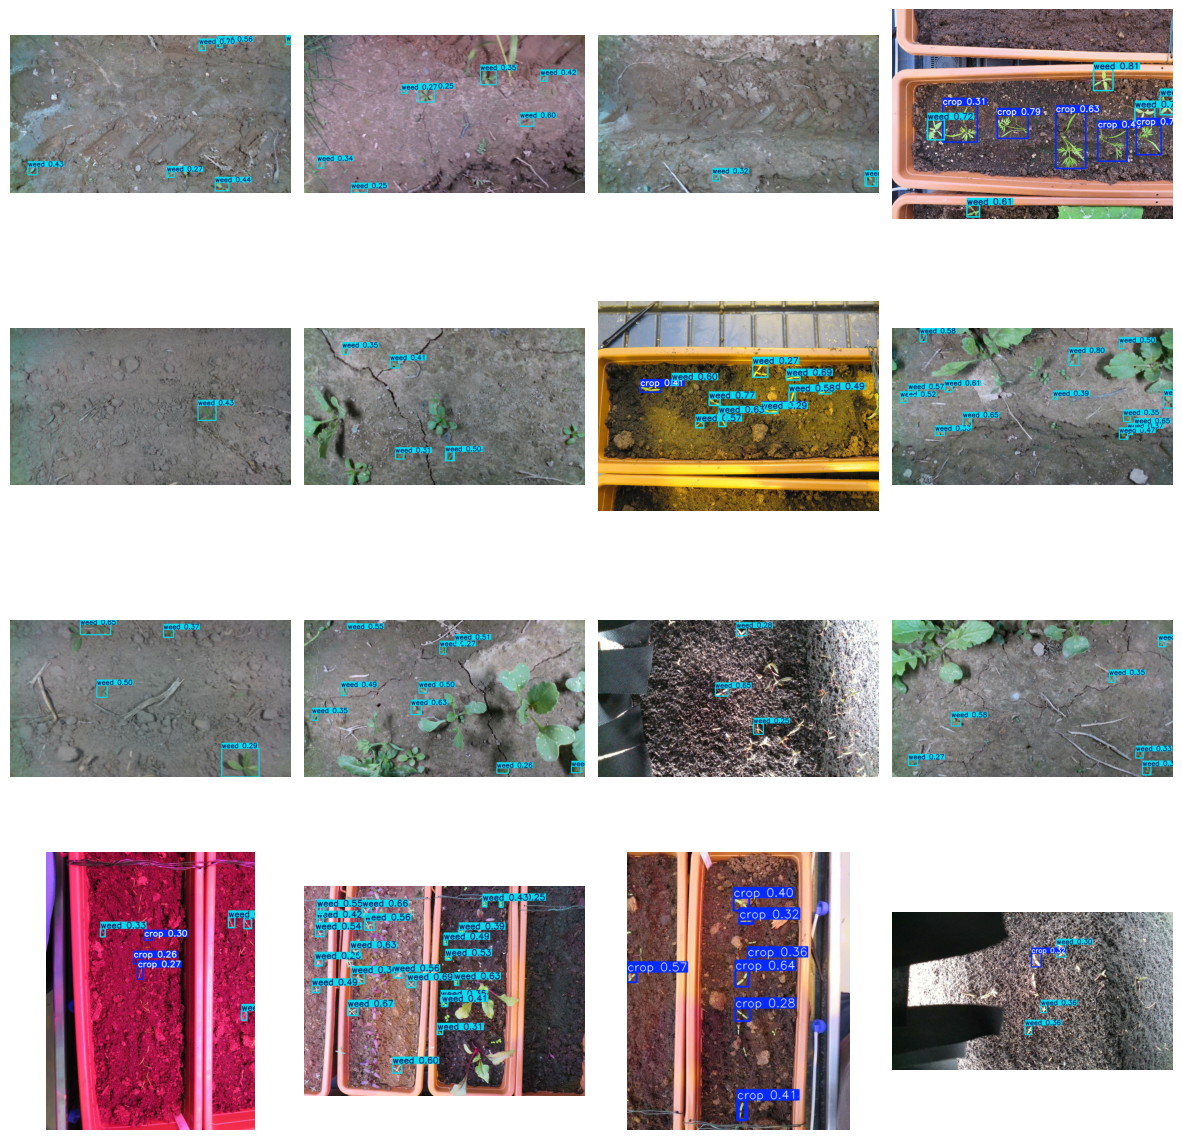

In [10]:
v8_trained = YOLO('/kaggle/working/ft_models/yolo_v8/weights/best.pt')
# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = weed_detection(img_path, v8_trained)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [11]:
v8_result = pd.read_csv('/kaggle/working/ft_models/yolo_v8/results.csv')
v8_result.head()

epoch        train/box_loss        train/cls_loss  \
0                     1                2.6267                2.3984   
1                     2                2.4583                1.9717   
2                     3                2.3793                1.8689   
3                     4                2.3765                1.8433   
4                     5                2.2741                1.7537   

         train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                1.2939               0.30799               0.50293   
1                1.2403               0.49981               0.45680   
2                1.2130               0.45528               0.49791   
3                1.1949               0.41640               0.45562   
4                1.1787               0.47149               0.56427   

       metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0               0.31425               0.15124                1.8349   
1               0.42864               0.17673                1.8452   
2               0.48236               0.17431                2.1801   
3               0.40049               0.17212                1.9361   
4               0.49425               0.22082                1.9863   

           val/cls_loss          val/dfl_loss                lr/pg0  \
0                1.7537                1.0170              0.067213   
1                1.5468                1.0128              0.034191   
2                1.6112                1.1067              0.001147   
3                1.5415                1.0417              0.000901   
4                1.4745                1.0540              0.000868   

                 lr/pg1                lr/pg2  
0              0.000331              0.000331  
1              0.000643              0.000643  
2              0.000932              0.000932  
3              0.000901              0.000901  
4              0.000868              0.000868

# visialiaze loss and accuracy 

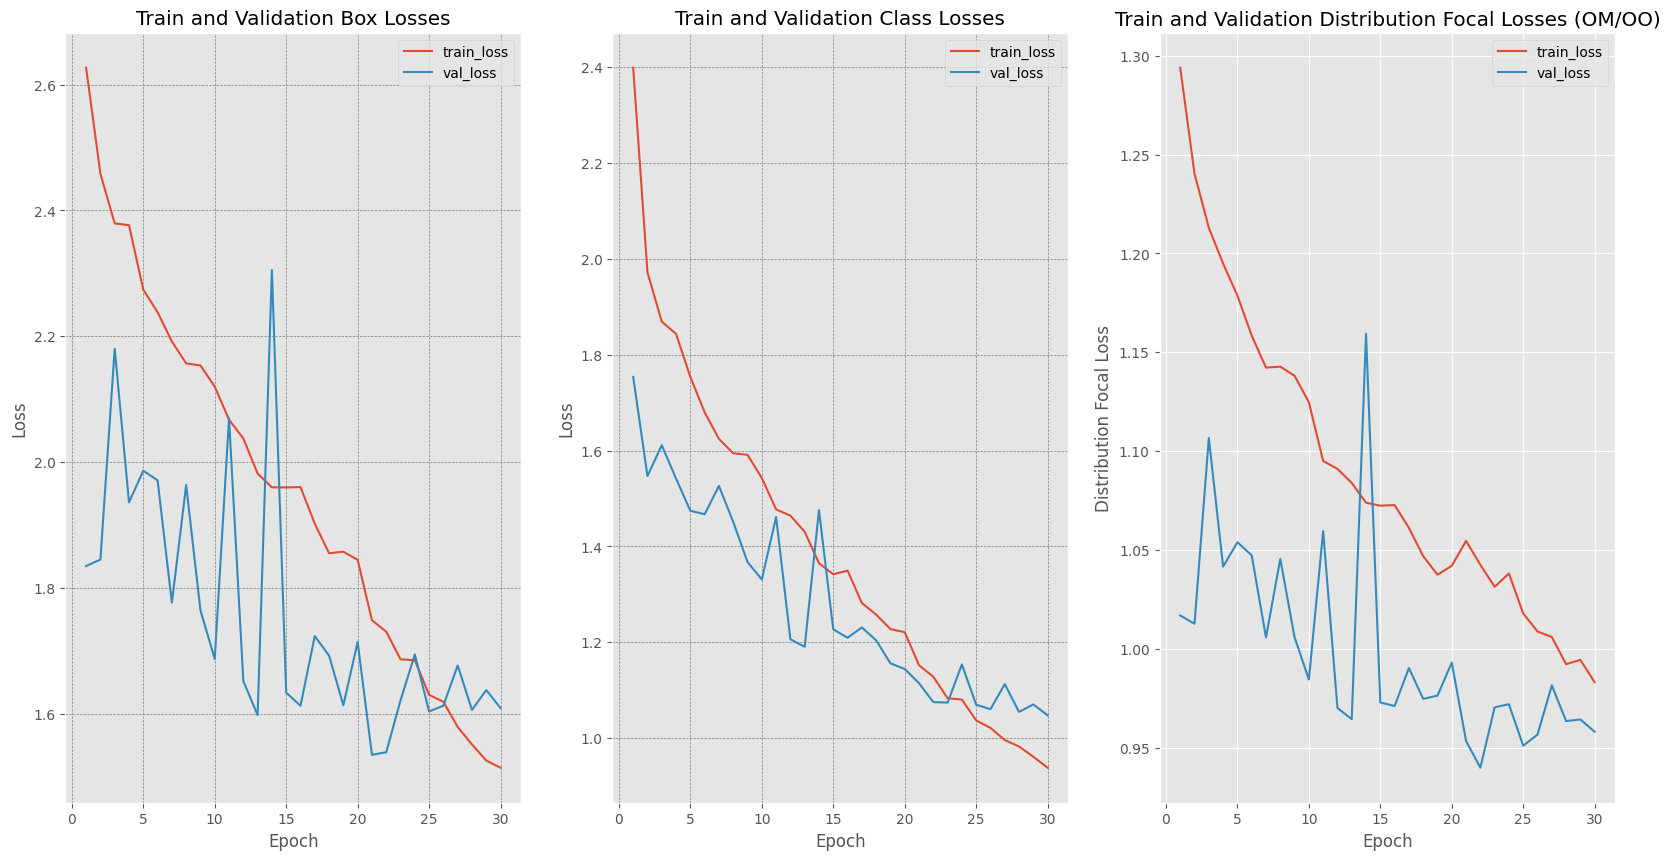

In [12]:
def show_v8_graphs(result):    
    result.columns = result.columns.str.strip()

    epoch_column = result['epoch']
    box_train_losses = result['train/box_loss']
    box_val_losses = result['val/box_loss']
    cls_train_losses = result['train/cls_loss']
    cls_val_losses = result['val/cls_loss']
    dfl_train_losses = result['train/dfl_loss']
    dfl_val_losses = result['val/dfl_loss']

    plt.figure(figsize=(20,10))
    plt.style.use('ggplot')  
    plt.subplot(1,3,1)
    plt.plot(epoch_column, box_train_losses, label='train_loss')
    plt.plot(epoch_column, box_val_losses, label='val_loss')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Box Losses')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(epoch_column, cls_train_losses, label='train_loss')
    plt.plot(epoch_column, cls_val_losses, label='val_loss')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Class Losses')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot(epoch_column, dfl_train_losses, label='train_loss')
    plt.plot(epoch_column, dfl_val_losses, label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Distribution Focal Loss')
    plt.title('Train and Validation Distribution Focal Losses (OM/OO)')
    plt.legend()
    plt.show()
show_v8_graphs(v8_result)    

# user prediction


0: 384x640 9 weeds, 702.4ms
Speed: 5.8ms preprocess, 702.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


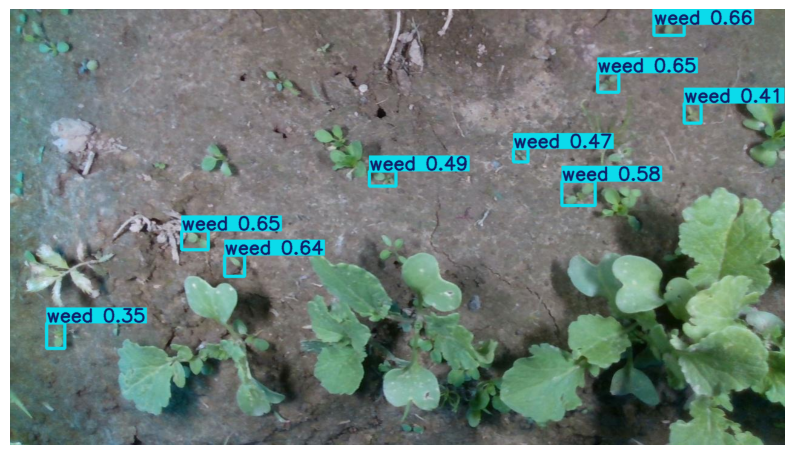

In [11]:
import supervision
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2
import warnings
import os

# Ignore warnings and disable WANDB
warnings.simplefilter('ignore')
os.environ['WANDB_DISABLED'] = 'true'

# Function to perform stone detections
def tumor_detection(img_path, model):
    # Read the image
    img = cv2.imread(img_path)
    # Pass the image through the detection model and get the result
    detect_result = model(img)
    # Plot the detections
    detect_img = detect_result[0].plot()
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    return detect_img

# Define the model path
model_path = 'best.pt'
# Load the trained model
v8_trained = YOLO(model_path)
# Function to display the detection result for a single image
def display_detection(img_path, model):
    detect_img = tumor_detection(img_path, model)
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(detect_img)
    plt.axis('off')
    plt.show()
# User provides the image path
user_image_path = r'images\32421_jpg.rf.5b8eaaf2a558ba55d0af6ffb324a546e.jpg'

# Display detection result for the provided image
display_detection(user_image_path, v8_trained)


In [ ]:
import supervision
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2
import warnings
import os

# Ignore warnings and disable WANDB
warnings.simplefilter('ignore')
os.environ['WANDB_DISABLED'] = 'true'

# Function to perform stone detections
def tumor_detection(img_path, model):
    # Read the image
    img = cv2.imread(img_path)
    # Pass the image through the detection model and get the result
    detect_result = model(img)
    # Plot the detections
    detect_img = detect_result[0].plot()
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    return detect_img

# Define the model path
model_path = '/kaggle/working/ft_models/yolo_v8/weights/best.pt'
# Load the trained model
v8_trained = YOLO(model_path)
# Function to display the detection result for a single image
def display_detection(img_path, model):
    detect_img = tumor_detection(img_path, model)
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(detect_img)
    plt.axis('off')
    plt.show()
# User provides the image path
user_image_path = r'/kaggle/input/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/test/images/32179_jpg.rf.9b7e752dea7e074755ddcab02e1778be.jpg'

# Display detection result for the provided image
display_detection(user_image_path, v8_trained)
